## İş Problemi

Online ayakkabı mağazası olan FLO müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor. Buna yönelik olarak müşterilerin davranışları tanımlanacak ve bu davranışlardaki öbeklenmelere göre gruplar oluşturulacak.

## Veri Seti Hikayesi

Veri seti Flo’dan son alışverişlerini 2020 - 2021 yıllarında OmniChannel (hem online hem offline alışveriş yapan) olarak yapan müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden oluşmaktadır.

# Görev1
## Adım1:
flo_data_20K.csv verisini okuyunuz.Dataframe’in kopyasını oluşturunuz.

In [426]:
import pandas as pd
import datetime as dt

df_ = pd.read_csv('/Users/mericgenc/Desktop/Python - Data Science/Miuul Data Scientist Path/02 - CRM Analytics/04_flo_rfm_analizi/dataset/flo_data_20k.csv')

df = df_.copy()

## Adım2:
Veri setinde;

a. İlk 10 gözlem,

b. Değişken isimleri,

c. Betimsel istatistik,

d. Boş değer,

e. Değişken tipleri, incelemesi yapınız.


In [427]:
df.head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]
5,e585280e-aae1-11e9-a2fc-000d3a38a36f,Desktop,Offline,2018-11-18,2021-03-13,2018-11-18,2021-03-13,1.0,2.0,150.87,49.99,[KADIN]
6,c445e4ee-6242-11ea-9d1a-000d3a38a36f,Android App,Android App,2020-03-04,2020-10-18,2020-10-18,2020-03-04,3.0,1.0,59.99,315.94,[AKTIFSPOR]
7,3f1b4dc8-8a7d-11ea-8ec0-000d3a38a36f,Mobile,Offline,2020-05-15,2020-08-12,2020-05-15,2020-08-12,1.0,1.0,49.99,113.64,[COCUK]
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,Android App,Android App,2020-01-23,2021-03-07,2021-03-07,2020-01-25,3.0,2.0,120.48,934.21,"[ERKEK, COCUK, KADIN]"
9,1143f032-440d-11ea-8b43-000d3a38a36f,Mobile,Mobile,2019-07-30,2020-10-04,2020-10-04,2019-07-30,1.0,1.0,69.98,95.98,"[KADIN, AKTIFSPOR]"


In [428]:
df.columns

Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')

In [429]:
df.describe().T
#Sayısal değerlerin %75 ile Max'ı arasındaki fark diğerlerinden daha fazla. Aykırılık olabilir

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


In [430]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [431]:
df.info()
# tarih içeren kategorik değişkenler date formatına çevrilebilir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

## Adım3:
Omnichannel müşterilerin hem online'dan hemde offline platformlardan alışveriş yaptığını ifade etmektedir. Her bir müşterinin toplam alışveriş sayısı ve harcaması için yeni değişkenler oluşturunuz.

In [432]:
df['total_order_num'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']
df['total_order_value'] = df['customer_value_total_ever_offline'] + df['customer_value_total_ever_online']
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order_num,total_order_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


## Adım4:
Değişken tiplerini inceleyiniz. Tarih ifade eden değişkenlerin tipini date'e çeviriniz.

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [434]:
date_cols = df.columns[df.columns.str.contains('date')]
df[date_cols] = df[date_cols].apply(pd.to_datetime)

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

## Adım5:
Alışveriş kanallarındaki müşteri sayısının, toplam alınan ürün sayısının ve toplam harcamaların dağılımına bakınız.

In [436]:
df.groupby('order_channel').agg({
    'master_id':'count',
    'total_order_num':'sum',
    'total_order_value':'sum'
})

,master_id,total_order_num,total_order_value
order_channel,,,
Android App,9495,52269.0,7819062.76
Desktop,2735,10920.0,1610321.46
Ios App,2833,15351.0,2525999.93
Mobile,4882,21679.0,3028183.16


## Adım6:
En fazla kazancı getiren ilk 10 müşteriyi sıralayınız

In [437]:
df.sort_values('total_order_value', ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order_num,total_order_value
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.0,2.0,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.0,45905.10
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,Android App,Android App,2018-08-06,2021-02-23,2021-02-23,2020-07-06,67.0,1.0,130.49,36687.80,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",68.0,36818.29
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.0,1.0,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.0,33918.10
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,Ios App,Offline,2021-03-01,2021-04-13,2021-03-18,2021-04-13,10.0,1.0,538.94,30688.47,"[ERKEK, KADIN, AKTIFSPOR]",11.0,31227.41
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,Android App,Offline,2021-04-07,2021-04-27,2021-04-07,2021-04-27,1.0,3.0,18119.14,2587.20,[AKTIFSPOR],4.0,20706.34
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.0,4.0,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.0,18443.57
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.0,1.0,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.0,16918.57
163,fef57ffa-aae6-11e9-a2fc-000d3a38a36f,Mobile,Desktop,2016-11-08,2021-05-12,2021-05-12,2020-07-09,36.0,1.0,180.73,12545.37,"[ERKEK, AKTIFSPOR]",37.0,12726.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.0,1.0,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.0,12282.24
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,Desktop,Desktop,2018-11-24,2020-11-11,2020-11-11,2019-12-06,18.0,2.0,64.97,12038.18,"[ERKEK, KADIN]",20.0,12103.15


In [438]:
df.groupby('master_id').agg({'total_order_value':'sum'}).sort_values('total_order_value', ascending=False).head(10)

,total_order_value
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29
73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10
7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41
47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34
a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,18443.57
d696c654-2633-11ea-8e1c-000d3a38a36f,16918.57
fef57ffa-aae6-11e9-a2fc-000d3a38a36f,12726.10
cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24


## Adım7:
En fazla siparişi veren ilk 10 müşteriyi sıralayınız.

In [439]:
df.sort_values('total_order_num',ascending=False).head(10)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order_num,total_order_value
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,Android App,Desktop,2013-10-11,2021-04-30,2021-04-30,2020-12-24,200.0,2.0,684.97,45220.13,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",202.0,45905.10
7223,cba59206-9dd1-11e9-9897-000d3a38a36f,Android App,Android App,2013-02-21,2021-05-09,2021-05-09,2020-01-25,130.0,1.0,49.99,12232.25,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",131.0,12282.24
8783,a57f4302-b1a8-11e9-89fa-000d3a38a36f,Android App,Offline,2019-08-07,2020-11-04,2020-09-07,2020-11-04,2.0,109.0,10239.46,143.98,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",111.0,10383.44
2619,fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,Android App,Offline,2018-10-18,2020-06-30,2018-10-18,2020-06-30,1.0,87.0,8432.25,139.98,[ERKEK],88.0,8572.23
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,Ios App,Ios App,2019-02-14,2021-04-05,2021-04-05,2020-02-17,2.0,81.0,3997.55,242.81,[ERKEK],83.0,4240.36
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,Ios App,Offline,2014-01-14,2021-05-18,2021-01-30,2021-05-18,81.0,1.0,1263.76,32654.34,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",82.0,33918.10
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2019-02-11,2021-02-11,2021-02-11,2020-12-24,3.0,74.0,4640.77,543.28,"[KADIN, AKTIFSPOR]",77.0,5184.05
10954,b27e241a-a901-11e9-a2fc-000d3a38a36f,Mobile,Mobile,2015-09-12,2021-04-01,2021-04-01,2019-10-08,72.0,3.0,292.93,5004.95,"[AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR]",75.0,5297.88
8068,d696c654-2633-11ea-8e1c-000d3a38a36f,Ios App,Ios App,2017-05-10,2021-04-13,2021-04-13,2019-08-15,69.0,1.0,82.48,16836.09,"[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]",70.0,16918.57
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,Desktop,Desktop,2020-02-16,2021-04-30,2021-04-30,2020-12-18,66.0,4.0,843.68,17599.89,"[ERKEK, KADIN, AKTIFSPOR]",70.0,18443.57


In [440]:
df.groupby('master_id').agg({'total_order_num':'sum'}).sort_values('total_order_num', ascending=False).head(10)

,total_order_num
master_id,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,202.0
cba59206-9dd1-11e9-9897-000d3a38a36f,131.0
a57f4302-b1a8-11e9-89fa-000d3a38a36f,111.0
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,88.0
329968c6-a0e2-11e9-a2fc-000d3a38a36f,83.0
73fd19aa-9e37-11e9-9897-000d3a38a36f,82.0
44d032ee-a0d4-11e9-a2fc-000d3a38a36f,77.0
b27e241a-a901-11e9-a2fc-000d3a38a36f,75.0
d696c654-2633-11ea-8e1c-000d3a38a36f,70.0


## Adım8:
Veri ön hazırlık sürecini fonksiyonlaştırınız.

In [441]:
def data_preparation(df):
    #total sipariş ve total value'yu ekliyoruz;
    df['total_order_num'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']
    df['total_order_value'] = df['customer_value_total_ever_offline'] + df['customer_value_total_ever_online']
    
    #date olan değişkenleri date formatına çeviriyoruz;
    date_cols = df.columns[df.columns.str.contains('date')]
    df[date_cols] = df[date_cols].apply(pd.to_datetime)
    
    return df

In [442]:
df = df_.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [443]:
data_preparation(df)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order_num,total_order_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19940,727e2b6e-ddd4-11e9-a848-000d3a38a36f,Android App,Offline,2019-09-21,2020-07-05,2020-06-05,2020-07-05,1.0,2.0,289.98,111.98,"[ERKEK, AKTIFSPOR]",3.0,401.96
19941,25cd53d4-61bf-11ea-8dd8-000d3a38a36f,Desktop,Desktop,2020-03-01,2020-12-22,2020-12-22,2020-03-01,1.0,1.0,150.48,239.99,[AKTIFSPOR],2.0,390.47
19942,8aea4c2a-d6fc-11e9-93bc-000d3a38a36f,Ios App,Ios App,2019-09-11,2021-05-24,2021-05-24,2019-09-11,2.0,1.0,139.98,492.96,[AKTIFSPOR],3.0,632.94
19943,e50bb46c-ff30-11e9-a5e8-000d3a38a36f,Android App,Android App,2019-03-27,2021-02-13,2021-02-13,2021-01-08,1.0,5.0,711.79,297.98,"[ERKEK, AKTIFSPOR]",6.0,1009.77


In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

## Görev 2:
### RFM Metriklerinin Hesaplanması

## Adım 1:
Recency, Frequency ve Monetary tanımlarını yapınız.

Recency: Yenilik demektir. Müşterinin en son siparişinden geçen zamanı belirtir

Frequency: Sıklık demektir. Müşterinin yaptığı sipariş sayısıdır

Monetary: Parasal getiriyi ifade eder. Müşterinin şirkete olan getirisini gösterir

In [445]:
from datetime import timedelta

analysis_date = df.last_order_date.max() + timedelta(days=2)
analysis_date

Timestamp('2021-06-01 00:00:00')

## Adım 2:
Müşteri özelinde Recency, Frequency ve Monetary metriklerini hesaplayınız

In [446]:
df.groupby('master_id').agg({
    'last_order_date': lambda date: (analysis_date - date.max()).days,
    'total_order_num': 'sum',
    'total_order_value': 'sum'
})

,last_order_date,total_order_num,total_order_value
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33
...,...,...,...
fff1db94-afd9-11ea-b736-000d3a38a36f,183,5.0,796.87
fff4736a-60a4-11ea-8dd8-000d3a38a36f,67,2.0,318.87
fffacd34-ae14-11e9-a2fc-000d3a38a36f,257,6.0,983.92


## Adım 3:
Hesapladığınız metrikleri rfm isimli bir değişkene atayınız.

In [447]:
rfm = df.groupby('master_id').agg({
    'last_order_date': lambda date: (analysis_date - date.max()).days,
    'total_order_num': 'sum',
    'total_order_value': 'sum'
})
rfm.head()

,last_order_date,total_order_num,total_order_value
master_id,,,
00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07
00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47
000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69
000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16
000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33


## Adım 4:
Oluşturduğunuz metriklerin isimlerini recency, frequency ve monetary olarak değiştiriniz.

In [448]:
rfm.reset_index(inplace=True)

In [449]:
rfm.columns = ['customer_id','recency','frequency','monetary']

In [450]:
rfm.head()

,customer_id,recency,frequency,monetary
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33


# Görev 3:
## RF Skorunun Hesaplanması

## Adım 1:
Recency, Frequency ve Monetary metriklerini qcut yardımı ile 1-5 arasında skorlara çeviriniz.

## Adım 2:
Bu skorları recency_score, frequency_score ve monetary_score olarak kaydediniz.

In [451]:
rfm['recency_score'] = pd.qcut(rfm['recency'],5, [5,4,3,2,1])
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method="first"),5, [1,2,3,4,5])
rfm['monetary_score'] = pd.qcut(rfm['monetary'],5, [1,2,3,4,5])

In [452]:
rfm

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,5,4,4
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,1,2,1
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,2,3,4
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,5,4,4
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,5,4,5
...,...,...,...,...,...,...,...
19940,fff1db94-afd9-11ea-b736-000d3a38a36f,183,5.0,796.87,2,4,4
19941,fff4736a-60a4-11ea-8dd8-000d3a38a36f,67,2.0,318.87,4,2,2
19942,fffacd34-ae14-11e9-a2fc-000d3a38a36f,257,6.0,983.92,1,4,4
19943,fffacecc-ddc3-11e9-a848-000d3a38a36f,132,9.0,1362.20,3,5,5


## Adım 3:
recency_score ve frequency_score’u tek bir değişken olarak ifade ediniz ve RF_SCORE olarak kaydediniz.

In [453]:
rfm['RF_SCORE'] = rfm['recency_score'].astype('str') + rfm['frequency_score'].astype('str')

In [454]:
rfm.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,5,4,4,54
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,1,2,1,12
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,2,3,4,23
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,5,4,4,54
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,5,4,5,54


# Görev 4:
## RF Skorunun Segment Olarak Tanımlanması

## Adım 1:
Oluşturulan RF skorları için segment tanımlamaları yapınız.

## Adım 2:
Aşağıdaki seg_map yardımı ile skorları segmentlere çeviriniz.

In [455]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [456]:
rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

In [457]:
rfm

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,5,4,4,54,champions
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,1,2,1,12,hibernating
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,2,3,4,23,at_Risk
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,5,4,4,54,champions
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,5,4,5,54,champions
...,...,...,...,...,...,...,...,...,...
19940,fff1db94-afd9-11ea-b736-000d3a38a36f,183,5.0,796.87,2,4,4,24,at_Risk
19941,fff4736a-60a4-11ea-8dd8-000d3a38a36f,67,2.0,318.87,4,2,2,42,potential_loyalists
19942,fffacd34-ae14-11e9-a2fc-000d3a38a36f,257,6.0,983.92,1,4,4,14,at_Risk
19943,fffacecc-ddc3-11e9-a848-000d3a38a36f,132,9.0,1362.20,3,5,5,35,loyal_customers


# Görev 5: Aksiyon Zamanı!

## Adım1:
Segmentlerin recency, frequnecy ve monetary ortalamalarını inceleyiniz.

In [458]:
rfm.groupby('segment').agg({
    'recency':['mean','count'],
    'frequency':['mean','count'],
    'monetary':['mean','count']
})

recency        frequency           monetary      
                           mean count       mean count         mean count
segment                                                                  
about_to_sleep       114.031649  1643   2.406573  1643   361.649373  1643
at_Risk              242.328997  3152   4.470178  3152   648.325038  3152
cant_loose           235.159129  1194  10.716918  1194  1481.652446  1194
champions             17.142187  1920   8.965104  1920  1410.708938  1920
hibernating          247.426303  3589   2.391474  3589   362.583299  3589
loyal_customers       82.557926  3375   8.356444  3375  1216.257224  3375
need_attention       113.037221   806   3.739454   806   553.436638   806
new_customers         17.976226   673   2.000000   673   344.049495   673
potential_loyalists   36.869744  2925   3.310769  2925   533.741344  2925
promising             58.694611   668   2.000000   668   334.153338   668

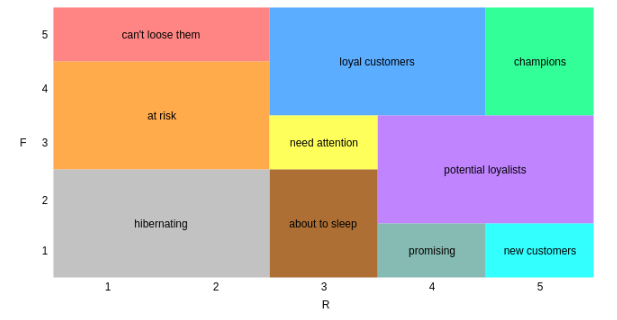

In [459]:
from IPython.display import Image
Image(filename='/Users/mericgenc/Desktop/Python - Data Science/Miuul Data Scientist Path/02 - CRM Analytics/04_flo_rfm_analizi/dataset/rfm_score.png')

## Adım2:
RFM analizi yardımıyla aşağıda verilen 2 case için ilgili profildeki müşterileri bulun ve müşteri id'lerini csv olarak kaydediniz.

a. FLO bünyesine yeni bir kadın ayakkabı markası dahil ediyor. Dahil ettiği markanın ürün fiyatları genel müşteri tercihlerinin üstünde. Bu nedenle markanın tanıtımı ve ürün satışları için ilgilenecek profildeki müşterilerle özel olarak iletişime geçmek isteniliyor. Sadık müşterilerinden(champions,loyal_customers) ve kadın kategorisinden alışveriş yapan kişiler özel olarak iletişim kurulacak müşteriler. Bu müşterilerin id numaralarını csv dosyasına kaydediniz.

In [460]:
target_segment = rfm[(rfm['segment']=='champions') | (rfm['segment']=='loyal_customers')]
target_segment.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,5,4,4,54,champions
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,5,4,4,54,champions
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,5,4,5,54,champions
18,003903e0-abce-11e9-a2fc-000d3a38a36f,68,5.0,577.47,4,4,3,44,loyal_customers
22,004bec18-9f7a-11e9-a2fc-000d3a38a36f,99,12.0,684.91,3,5,4,35,loyal_customers


In [461]:
customer_ids = df[(df['master_id'].isin(target_segment['customer_id'])) & (df['interested_in_categories_12'].str.contains('KADIN'))]['master_id']
customer_ids.reset_index(drop=True, inplace=True)

customer_ids.to_csv('/Users/mericgenc/Desktop/Python - Data Science/Miuul Data Scientist Path/02 - CRM Analytics/04_flo_rfm_analizi/outputs/ozel_musteriler.csv')

In [462]:
customer_ids.shape

(2487,)

b. Erkek ve Çocuk ürünlerinde %40'a yakın indirim planlanmaktadır. Bu indirimle ilgili kategorilerle ilgilenen geçmişte iyi müşteri olan ama uzun süredir alışveriş yapmayan kaybedilmemesi gereken müşteriler, uykuda olanlar ve yeni gelen müşteriler özel olarak hedef alınmak isteniyor. Uygun profildeki müşterilerin id'lerini csv dosyasına kaydediniz.

In [463]:
target_segment2 = rfm[rfm['segment'].isin(['cant_loose','at_Risk','hibernating','new_customers'])]
target_segment2.head()

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RF_SCORE,segment
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,1,2,1,12,hibernating
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,2,3,4,23,at_Risk
5,00136ce2-a562-11e9-a2fc-000d3a38a36f,203,2.0,359.45,2,1,2,21,hibernating
9,0022f41e-5597-11eb-9e65-000d3a38a36f,12,2.0,154.98,5,1,1,51,new_customers
10,0025f17c-eeaf-11ea-bb5a-000d3a38a36f,186,4.0,791.97,2,3,4,23,at_Risk


In [464]:
customer_ids2 = df[(df['master_id'].isin(target_segment2['customer_id'])) & ((df['interested_in_categories_12'].str.contains('ERKEK')) | (df['interested_in_categories_12'].str.contains('COCUK')))]['master_id']
customer_ids2.reset_index(drop=True, inplace=True)

customer_ids2.to_csv('/Users/mericgenc/Desktop/Python - Data Science/Miuul Data Scientist Path/02 - CRM Analytics/04_flo_rfm_analizi/outputs/indirim_yapilacak_musteriler.csv')

In [465]:
customer_ids2.shape

(4649,)

## Bonus: Fonksiyonlaştırma

In [466]:
def create_rfm(df):
    #total sipariş ve total value'yu ekliyoruz;
    df['total_order_num'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']
    df['total_order_value'] = df['customer_value_total_ever_offline'] + df['customer_value_total_ever_online']
    
    #date olan değişkenleri date formatına çeviriyoruz;
    date_cols = df.columns[df.columns.str.contains('date')]
    df[date_cols] = df[date_cols].apply(pd.to_datetime)

    #RFM metriklerinin hazırlanması;
    analysis_date = df.last_order_date.max() + timedelta(days=2)

    rfm = df.groupby('master_id').agg({
    'last_order_date': lambda date: (analysis_date - date.max()).days,
    'total_order_num': 'sum',
    'total_order_value': 'sum'
    })

    rfm.reset_index(inplace=True)
    rfm.columns = ['customer_id','recency','frequency','monetary']

    #RFM skorları;
    rfm['recency_score'] = pd.qcut(rfm['recency'],5, [5,4,3,2,1])
    rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method="first"),5, [1,2,3,4,5])
    rfm['monetary_score'] = pd.qcut(rfm['monetary'],5, [1,2,3,4,5])
    rfm['RF_SCORE'] = rfm['recency_score'].astype('str') + rfm['frequency_score'].astype('str')

    #Segmentlerin belirlenmesi;
    seg_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at_Risk',
        r'[1-2]5': 'cant_loose',
        r'3[1-2]': 'about_to_sleep',
        r'33': 'need_attention',
        r'[3-4][4-5]': 'loyal_customers',
        r'41': 'promising',
        r'51': 'new_customers',
        r'[4-5][2-3]': 'potential_loyalists',
        r'5[4-5]': 'champions'
    }
    rfm['segment'] = rfm['RF_SCORE'].replace(seg_map, regex=True)

    return rfm[["customer_id", "recency","frequency","monetary","RF_SCORE","segment"]]

    
    

In [467]:
rfm_df = create_rfm(df)

In [424]:
rfm_df

,customer_id,recency,frequency,monetary,RF_SCORE,segment
0,00016786-2f5a-11ea-bb80-000d3a38a36f,10,5.0,776.07,54,champions
1,00034aaa-a838-11e9-a2fc-000d3a38a36f,298,3.0,269.47,12,hibernating
2,000be838-85df-11ea-a90b-000d3a38a36f,213,4.0,722.69,23,at_Risk
3,000c1fe2-a8b7-11ea-8479-000d3a38a36f,27,7.0,874.16,54,champions
4,000f5e3e-9dde-11ea-80cd-000d3a38a36f,20,7.0,1620.33,54,champions
...,...,...,...,...,...,...
19940,fff1db94-afd9-11ea-b736-000d3a38a36f,183,5.0,796.87,24,at_Risk
19941,fff4736a-60a4-11ea-8dd8-000d3a38a36f,67,2.0,318.87,42,potential_loyalists
19942,fffacd34-ae14-11e9-a2fc-000d3a38a36f,257,6.0,983.92,14,at_Risk
19943,fffacecc-ddc3-11e9-a848-000d3a38a36f,132,9.0,1362.20,35,loyal_customers
